<a href="https://colab.research.google.com/github/rikkoder/quantum-resistant-blockchain/blob/main/Enhancing_Security_of_Blockchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Add falcon modules**

In [104]:
## installing Falcon
!git clone https://github.com/tprest/falcon.py /content/falcon

fatal: destination path '/content/falcon' already exists and is not an empty directory.


In [105]:
## include my script to create requirements.txt file
!curl -sl "https://raw.githubusercontent.com/rikkoder/myscripts/main/add_req.py" -o /content/falcon/add_req.py

In [106]:
## install requirements
!python3 /content/falcon/add_req.py
!xargs -n 1 -a /content/falcon/requirements.txt pip install

  Using cached crypto-1.4.1-py2.py3-none-any.whl (18 kB)
ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
ERROR: Could not find a version that satisfies the requirement timeit (from versions: none)
ERROR: No matching distribution found for timeit
ERROR: Could not find a version that satisfies the requirement sys (from versions: none)
ERROR: No matching distribution found for sys
ERROR: Could not find a version that satisfies the requirement copy (from versions: none)
ERROR: No matching distribution found for copy
ERROR: Could not find a version that satisfies the requirement plt (from versions: none)
ERROR: No matching distribution found for plt
ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution fou

In [107]:
## use pycryptodome instead of crypto (deprecated)
!pip3 uninstall --yes crypto
!pip3 uninstall --yes pycrypto
!pip3 install pycryptodome

Found existing installation: crypto 1.4.1
Uninstalling crypto-1.4.1:
  Successfully uninstalled crypto-1.4.1


In [108]:
## add falcon to path
import sys
sys.path.insert(0,'/content/falcon')

**Add packages required for quantum simmulation**

In [109]:
!pip install qiskit
!pip install qiskit-aer

**Add dilithium modules**

In [110]:
## installing dilithium
!git clone https://github.com/giacomopope/dilithium-py /content/dilithium

## install requirements
!pip install -r /content/dilithium/requirements.txt

## add dilithium to path
import sys
sys.path.insert(0,'/content/dilithium')

fatal: destination path '/content/dilithium' already exists and is not an empty directory.


**ECC Blockchain (unsecure)**

In [111]:
# ## backup
# import time
# import hashlib
# from cryptography.hazmat.primitives import serialization
# from cryptography.hazmat.primitives.asymmetric import ec, utils
# from cryptography.hazmat.primitives import hashes
# from cryptography.hazmat.primitives.asymmetric import padding

# class Block:
#     def __init__(self, index, previous_hash, timestamp, data, hash, nonce):
#         self.index = index
#         self.previous_hash = previous_hash
#         self.timestamp = timestamp
#         self.data = data
#         self.hash = hash
#         self.nonce = nonce

# def calculate_hash(index, previous_hash, timestamp, data, nonce):
#     return hashlib.sha256(f"{index}{previous_hash}{timestamp}{data}{nonce}".encode('utf-8')).hexdigest()

# def mine_block(index, previous_hash, timestamp, data, difficulty):
#     nonce = 0
#     prefix = '0' * difficulty
#     while True:
#         hash_attempt = calculate_hash(index, previous_hash, timestamp, data, nonce)
#         if hash_attempt.startswith(prefix):
#             return Block(index, previous_hash, timestamp, data, hash_attempt, nonce)
#         nonce += 1

# class Blockchain:
#     def __init__(self):
#         self.chain = [self.create_genesis_block()]
#         self.difficulty = 2

#     def create_genesis_block(self):
#         return Block(0, "0", time.time(), "Genesis Block", "0", 0)

#     def get_latest_block(self):
#         return self.chain[-1]

#     def add_block(self, new_block):
#         self.chain.append(new_block)


# class BlockchainUser:
#   def __init__(self, name):
#     self.name = name
#     key_gen_start_time = time.time()
#     self.sk, self.pk = generate_ecc_key_pair()
#     key_gen_end_time = time.time()
#     self.key_gen_time = key_gen_end_time - key_gen_start_time


# def generate_ecc_key_pair():
#     private_key = ec.generate_private_key(ec.SECP256R1())
#     public_key = private_key.public_key()
#     return private_key, public_key

# def sign_transaction(user, data):
#     signature = user.sk.sign(
#         data.encode('utf-8'),
#         ec.ECDSA(hashes.SHA256())
#     )
#     return signature

# def simulate_data_packet_sending(user, packet_size_kb):
#     #private_key, public_key = generate_ecc_key_pair()

#     data = "X" * (packet_size_kb * 1024)

#     # Transaction creation time
#     transaction_timestamp = time.time()

#     # Sign the transaction with the ECC private key
#     signature = sign_transaction(user, data)

#     # Simulate block creation time
#     blockchain = Blockchain()
#     latest_block = blockchain.get_latest_block()
#     block_creation_start_time = time.time()

#     # Simulate block generation time (mining)
#     new_block = mine_block(
#         latest_block.index + 1,
#         latest_block.hash,
#         time.time(),
#         data,
#         blockchain.difficulty
#     )
#     blockchain.add_block(new_block)

#     block_creation_end_time = time.time()

#     return {
#         "Packet Size (KB)": packet_size_kb,
#         "Transaction Timestamp": transaction_timestamp,
#         "Block Creation Time": block_creation_end_time - block_creation_start_time,
#         "Signature": signature.hex(),
#         "Block Hash": new_block.hash
#     }

# if __name__ == "__main__":
#     user = BlockchainUser("Alice")
#     print('key generation time for user: ', user.key_gen_time, '\n\n')
#     packet_sizes_kb = [1, 10, 100, 1024, 10240, 102400]

#     for packet_size_kb in packet_sizes_kb:
#         print(f"\nSending Data Packet of Size: {packet_size_kb} KB")
#         result = simulate_data_packet_sending(user, packet_size_kb)
#         print(result)


In [112]:
import time
import hashlib
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.primitives.asymmetric import ec, utils
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import padding


class ECC_Blockchain:
    class Block:
        def __init__(self, index, previous_hash, timestamp, data, hash, nonce):
            self.index = index
            self.previous_hash = previous_hash
            self.timestamp = timestamp
            self.data = data
            self.hash = hash
            self.nonce = nonce

    def calculate_hash(index, previous_hash, timestamp, data, nonce):
        return hashlib.sha256(f"{index}{previous_hash}{timestamp}{data}{nonce}".encode('utf-8')).hexdigest()

    def mine_block(index, previous_hash, timestamp, data, difficulty):
        nonce = 0
        prefix = '0' * difficulty
        while True:
            hash_attempt = ECC_Blockchain.calculate_hash(index, previous_hash, timestamp, data, nonce)
            if hash_attempt.startswith(prefix):
                return ECC_Blockchain.Block(index, previous_hash, timestamp, data, hash_attempt, nonce)
            nonce += 1

    class Blockchain:
        def __init__(self):
            self.chain = [self.create_genesis_block()]
            self.difficulty = 2

        def create_genesis_block(self):
            return ECC_Blockchain.Block(0, "0", time.time(), "Genesis Block", "0", 0)

        def get_latest_block(self):
            return self.chain[-1]

        def add_block(self, new_block):
            self.chain.append(new_block)


    class BlockchainUser:
        def __init__(self, name):
            self.name = name
            key_gen_start_time = time.time()
            self.sk, self.pk = ECC_Blockchain.generate_ecc_key_pair()
            key_gen_end_time = time.time()
            self.key_gen_time = key_gen_end_time - key_gen_start_time


    def generate_ecc_key_pair():
        private_key = ec.generate_private_key(ec.SECP256R1())
        public_key = private_key.public_key()
        return private_key, public_key

    def sign_transaction(user, data):
        signature = user.sk.sign(
            data.encode('utf-8'),
            ec.ECDSA(hashes.SHA256())
        )
        return signature

    def simulate_data_packet_sending(user, packet_size_kb):
        #private_key, public_key = generate_ecc_key_pair()

        data = "X" * (packet_size_kb * 1024)

        # Transaction creation time
        transaction_timestamp = time.time()

        # Sign the transaction with the ECC private key
        signature = ECC_Blockchain.sign_transaction(user, data)

        # Simulate block creation time
        blockchain = ECC_Blockchain.Blockchain()
        latest_block = blockchain.get_latest_block()
        block_creation_start_time = time.time()

        # Simulate block generation time (mining)
        new_block = ECC_Blockchain.mine_block(
            latest_block.index + 1,
            latest_block.hash,
            time.time(),
            data,
            blockchain.difficulty
        )
        blockchain.add_block(new_block)

        block_creation_end_time = time.time()

        return {
            "Packet Size (KB)": packet_size_kb,
            "Transaction Timestamp": transaction_timestamp,
            "Block Creation Time": block_creation_end_time - block_creation_start_time,
            "Signature": signature.hex(),
            "Block Hash": new_block.hash
        }

    def benchmark(self, packet_sizes_kb = [1, 10, 100]):
        user = ECC_Blockchain.BlockchainUser("Alice")
        result = {'asym_key_gen_time': user.key_gen_time}

        for packet_size_kb in packet_sizes_kb:
            print(f"\nSending Data Packet of Size: {packet_size_kb} KB")
            result[f"packet_size_{packet_size_kb}_kb"] = ECC_Blockchain.simulate_data_packet_sending(user, packet_size_kb)

        return result

bc = ECC_Blockchain()
print(bc.benchmark())


Sending Data Packet of Size: 1 KB

Sending Data Packet of Size: 10 KB

Sending Data Packet of Size: 100 KB
{'asym_key_gen_time': 0.00040078163146972656, 'packet_size_1_kb': {'Packet Size (KB)': 1, 'Transaction Timestamp': 1700564228.5797973, 'Block Creation Time': 0.0005273818969726562, 'Signature': '3045022047784540ff690bdecbc01eee26c23e7ca095c85b966e92b1433ee9a1e15ea3ac022100ccbc5b3b2f31b4a9c923311e93e91ea6610452db86a13fdff3df5562083421a5', 'Block Hash': '0061bd4b8feb50c43d039ba5708059e67e817527f7a25048f12843f530d444a4'}, 'packet_size_10_kb': {'Packet Size (KB)': 10, 'Transaction Timestamp': 1700564228.580992, 'Block Creation Time': 0.0054242610931396484, 'Signature': '304502202ea26e4d4fda16632748f716c13471869aac1db41eedf294b0d276031b6e919b0221008a202475c95e3eccc191c449dcf36811d6d44e97b409e59968a04f23d5a06b38', 'Block Hash': '00a79a28ed7dbbc799545ae27cd86d3160ee4a7b0a43423322466a6372962208'}, 'packet_size_100_kb': {'Packet Size (KB)': 100, 'Transaction Timestamp': 1700564228.587317,

**QKD qiskit implementation**

In [113]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np

┌───┐┌─┐ ░ ┌───┐┌─┐
  q: ┤ H ├┤M├─░─┤ H ├┤M├
     └───┘└╥┘ ░ └───┘└╥┘
c: 1/══════╩══════════╩═
           0          0

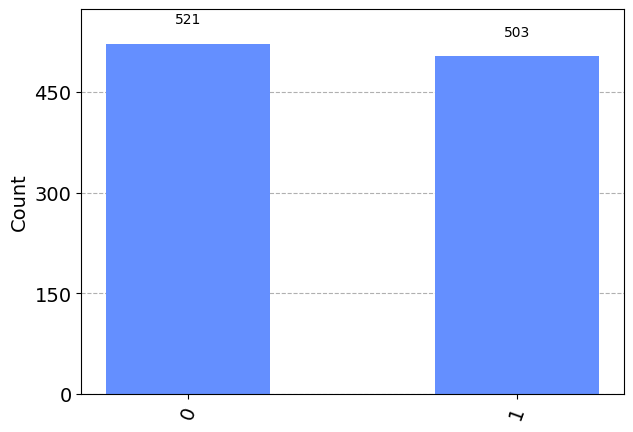

In [114]:
qc = QuantumCircuit(1,1)
# Alice prepares qubit in state |+>
qc.h(0)
# Alice now sends the qubit to Bob
# but Eve intercepts and tries to read it
qc.measure(0, 0)
qc.barrier()
# Eve then passes this on to Bob
# who measures it in the X-basis
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(qc)
plot_histogram(job.result().get_counts())

In [115]:
def QKD_encode_message(bits, bases):
    n = len(bits)
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0: # Prepare qubit in Z-basis
            if bits[i] == 0:
                pass
            else:
                qc.x(0)
        else: # Prepare qubit in X-basis
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message


def QKD_measure_message(message, bases):
    n = len(message)
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0: # measuring in Z-basis
            message[q].measure(0,0)
        if bases[q] == 1: # measuring in X-basis
            message[q].h(0)
            message[q].measure(0,0)
        aer_sim = Aer.get_backend('aer_simulator')
        result = aer_sim.run(message[q], shots=1, memory=True).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements


def QKD_remove_garbage(a_bases, b_bases, bits):
    n = len(bits)
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            # If both used the same basis, add
            # this to the list of 'good' bits
            good_bits.append(bits[q])
    return good_bits


def QKD_sample_bits(bits, selection):
    sample = []
    for i in selection:
        # use np.mod to make sure the
        # bit we sample is always in
        # the list range
        i = np.mod(i, len(bits))
        # pop(i) removes the element of the
        # list at index 'i'
        sample.append(bits.pop(i))
    return sample

In [116]:
def generate_shared_key_QKD(key_size):
    sample_size = 22 # Change this to something lower and see if
                    # Eve can intercept the message without Alice
                    # and Bob finding out

    n = (key_size+sample_size)*2 + 20

    # Step 1
    alice_bits = randint(2, size=n)
    alice_bases = randint(2, size=n)
    # Step 2
    message = QKD_encode_message(alice_bits, alice_bases)
    # Interception!
    eve_bases = randint(2, size=n)
    # intercepted_message = measure_message(message, eve_bases)
    # Step 3
    bob_bases = randint(2, size=n)
    bob_results = QKD_measure_message(message, bob_bases)
    # Step 4
    bob_key = QKD_remove_garbage(alice_bases, bob_bases, bob_results)
    alice_key = QKD_remove_garbage(alice_bases, bob_bases, alice_bits)
    # Step 5
    bit_selection = randint(n, size=sample_size)

    # print(alice_key, bob_key, bit_selection, sep='\n')

    bob_sample = QKD_sample_bits(bob_key, bit_selection)
    alice_sample = QKD_sample_bits(alice_key, bit_selection)

    # print('\nkeys after validation', alice_key, bob_key, sep='\n')

    if bob_sample != alice_sample:
        raise("Eve's interference was detected.")
    else:
        # print("Eve went undetected!")
        return alice_key

**convert Shared Key to fixed size 128bit AES key**

In [117]:
import time

def generate_fixed_size_shared_key_QKD(key_size = 128):
    shared_key = generate_shared_key_QKD(key_size)
    while len(shared_key) < key_size:
        new_key_size = key_size - len(shared_key)
        new_shared_key = generate_shared_key_QKD(new_key_size)
        shared_key += new_shared_key
    shared_key_bin_str = ''.join(map(str, shared_key[:key_size]))
    shared_key = int(shared_key_bin_str, 2)
    return shared_key


start_time = time.time()
shared_key = generate_fixed_size_shared_key_QKD()
end_time = time.time()

print("time taken: ", end_time - start_time, " shared key: ", bin(shared_key)[2:])

time taken:  0.6095681190490723  shared key:  11111111110001001000110100001001101110101001011101000011010000001111100100100111011110010010110000011100001011010111001100101001


**AES**

In [118]:
Sbox = (
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16,
)

InvSbox = (
    0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB,
    0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB,
    0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E,
    0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25,
    0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92,
    0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84,
    0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06,
    0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B,
    0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73,
    0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E,
    0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B,
    0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4,
    0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F,
    0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF,
    0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D,
)


xtime = lambda a: (((a << 1) ^ 0x1B) & 0xFF) if (a & 0x80) else (a << 1)


Rcon = (
    0x00, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40,
    0x80, 0x1B, 0x36, 0x6C, 0xD8, 0xAB, 0x4D, 0x9A,
    0x2F, 0x5E, 0xBC, 0x63, 0xC6, 0x97, 0x35, 0x6A,
    0xD4, 0xB3, 0x7D, 0xFA, 0xEF, 0xC5, 0x91, 0x39,
)


def text2matrix(text):
    matrix = []
    for i in range(16):
        byte = (text >> (8 * (15 - i))) & 0xFF
        if i % 4 == 0:
            matrix.append([byte])
        else:
            matrix[i // 4].append(byte)
    return matrix


def matrix2text(matrix):
    text = 0
    for i in range(4):
        for j in range(4):
            text |= (matrix[i][j] << (120 - 8 * (4 * i + j)))
    return text


class AES:
    def __init__(self, master_key):
        self.change_key(master_key)

    def change_key(self, master_key):
        self.round_keys = text2matrix(master_key)

        for i in range(4, 4 * 11):
            self.round_keys.append([])
            if i % 4 == 0:
                byte = self.round_keys[i - 4][0]        \
                     ^ Sbox[self.round_keys[i - 1][1]]  \
                     ^ Rcon[i // 4]
                self.round_keys[i].append(byte)

                for j in range(1, 4):
                    byte = self.round_keys[i - 4][j]    \
                         ^ Sbox[self.round_keys[i - 1][(j + 1) % 4]]
                    self.round_keys[i].append(byte)
            else:
                for j in range(4):
                    byte = self.round_keys[i - 4][j]    \
                         ^ self.round_keys[i - 1][j]
                    self.round_keys[i].append(byte)


    def encrypt(self, plaintext):
        self.plain_state = text2matrix(plaintext)

        self.__add_round_key(self.plain_state, self.round_keys[:4])

        for i in range(1, 10):
            self.__round_encrypt(self.plain_state, self.round_keys[4 * i : 4 * (i + 1)])

        self.__sub_bytes(self.plain_state)
        self.__shift_rows(self.plain_state)
        self.__add_round_key(self.plain_state, self.round_keys[40:])

        return matrix2text(self.plain_state)

    def decrypt(self, ciphertext):
        self.cipher_state = text2matrix(ciphertext)

        self.__add_round_key(self.cipher_state, self.round_keys[40:])
        self.__inv_shift_rows(self.cipher_state)
        self.__inv_sub_bytes(self.cipher_state)

        for i in range(9, 0, -1):
            self.__round_decrypt(self.cipher_state, self.round_keys[4 * i : 4 * (i + 1)])

        self.__add_round_key(self.cipher_state, self.round_keys[:4])

        return matrix2text(self.cipher_state)

    def __add_round_key(self, s, k):
        for i in range(4):
            for j in range(4):
                s[i][j] ^= k[i][j]


    def __round_encrypt(self, state_matrix, key_matrix):
        self.__sub_bytes(state_matrix)
        self.__shift_rows(state_matrix)
        self.__mix_columns(state_matrix)
        self.__add_round_key(state_matrix, key_matrix)


    def __round_decrypt(self, state_matrix, key_matrix):
        self.__add_round_key(state_matrix, key_matrix)
        self.__inv_mix_columns(state_matrix)
        self.__inv_shift_rows(state_matrix)
        self.__inv_sub_bytes(state_matrix)

    def __sub_bytes(self, s):
        for i in range(4):
            for j in range(4):
                s[i][j] = Sbox[s[i][j]]


    def __inv_sub_bytes(self, s):
        for i in range(4):
            for j in range(4):
                s[i][j] = InvSbox[s[i][j]]


    def __shift_rows(self, s):
        s[0][1], s[1][1], s[2][1], s[3][1] = s[1][1], s[2][1], s[3][1], s[0][1]
        s[0][2], s[1][2], s[2][2], s[3][2] = s[2][2], s[3][2], s[0][2], s[1][2]
        s[0][3], s[1][3], s[2][3], s[3][3] = s[3][3], s[0][3], s[1][3], s[2][3]


    def __inv_shift_rows(self, s):
        s[0][1], s[1][1], s[2][1], s[3][1] = s[3][1], s[0][1], s[1][1], s[2][1]
        s[0][2], s[1][2], s[2][2], s[3][2] = s[2][2], s[3][2], s[0][2], s[1][2]
        s[0][3], s[1][3], s[2][3], s[3][3] = s[1][3], s[2][3], s[3][3], s[0][3]

    def __mix_single_column(self, a):
        t = a[0] ^ a[1] ^ a[2] ^ a[3]
        u = a[0]
        a[0] ^= t ^ xtime(a[0] ^ a[1])
        a[1] ^= t ^ xtime(a[1] ^ a[2])
        a[2] ^= t ^ xtime(a[2] ^ a[3])
        a[3] ^= t ^ xtime(a[3] ^ u)


    def __mix_columns(self, s):
        for i in range(4):
            self.__mix_single_column(s[i])


    def __inv_mix_columns(self, s):
        for i in range(4):
            u = xtime(xtime(s[i][0] ^ s[i][2]))
            v = xtime(xtime(s[i][1] ^ s[i][3]))
            s[i][0] ^= u
            s[i][1] ^= v
            s[i][2] ^= u
            s[i][3] ^= v

        self.__mix_columns(s)

**encode and split message into 128bits blocks**

In [119]:
import time

## use fixed size (128bits) shared key
# import random
# shared_key = ''.join(random.choices('01',k=128))
# print(shared_key)


## encode message into bits
def encode_message(text):
    text = text.encode('utf-8')
    encoded_text = 0
    for byte in text:
        encoded_text <<= 8
        encoded_text |= byte
    return encoded_text


## decode message from bits
def decode_message(encoded_text):
    text = []
    while (encoded_text != 0):
        text.append(encoded_text & 0xff)
        encoded_text >>= 8
    return bytes(text[::-1]).decode('utf-8')


## func to split message into blocks of 128bits
def split_message(msg):
    msg = str(msg)
    blocks = []
    encoded_msg = encode_message(msg)
    _128bits = (1 << 128)-1
    while (encoded_msg != 0):
        blocks.append(encoded_msg & _128bits)
        encoded_msg >>= 128
    return blocks[::-1]


msg = 'this is message, hello!'
print('\noriginal message:', msg, sep='\n')
blocks = split_message(msg)
print('\nmessage blocks:', blocks, sep='\n')


aes = AES(shared_key)

for block in blocks:
    print('\n\nblock message:', decode_message(block), sep='\n')

    encryption_start_time = time.time()
    cipher_text = aes.encrypt(block)
    encryption_end_time = time.time()
    print('\ncipher_text:', cipher_text, sep='\n')
    print('\nencryption_time: ', encryption_end_time - encryption_start_time)

    decryption_start_time = time.time()
    plain_text = decode_message(aes.decrypt(cipher_text))
    decryption_end_time = time.time()
    print('\nplain_text:', plain_text, sep='\n')
    print('\ndecryption_time: ', decryption_end_time - decryption_start_time)



original message:
this is message, hello!

message blocks:
[32765899410794867, 43103313893014792307549137031951839009]


block message:
this is

cipher_text:
92847335391520557026519606457061801685

encryption_time:  0.00039076805114746094

plain_text:
this is

decryption_time:  0.0005173683166503906


block message:
 message, hello!

cipher_text:
316191136587261875257039156496717770419

encryption_time:  0.00038313865661621094

plain_text:
 message, hello!

decryption_time:  0.0009055137634277344


**ECC Blockchain with Symmetric Encryption using QKD shared key (unsecure from internal attacks)**

In [120]:
# ## backup
# import time
# import hashlib
# from cryptography.hazmat.primitives import serialization
# from cryptography.hazmat.primitives.asymmetric import ec, utils
# from cryptography.hazmat.primitives import hashes
# from cryptography.hazmat.primitives.asymmetric import padding

# class Block:
#     delimiter = "XOXOXOX"

#     def __init__(self, index, previous_hash, timestamp, data, hash, nonce):
#         self.index = int(index)
#         self.previous_hash = str(previous_hash)
#         self.timestamp = float(timestamp)
#         self.data = str(data)
#         self.hash = str(hash)
#         self.nonce = int(nonce)

#     def __eq__(self, block):
#         if isinstance(block, Block):
#             return self.index == block.index and self.previous_hash == block.previous_hash and self.timestamp == block.timestamp and self.data == block.data and self.hash == block.hash and self.nonce == block.nonce
#         return False

#     def __str__(self):
#         return Block.delimiter.join(map(str, [self.index, self.previous_hash, self.timestamp, self.data, self.hash, self.nonce]))

#     def show(self):
#         print(self.index, self.previous_hash, self.timestamp, len(self.data), self.hash, self.nonce)

#     def encrypt(self, user):
#         blocks = split_message(str(self))
#         encrypted_block = ""
#         for block in blocks:
#             encrypted_block += str(bin(user.aes.encrypt(block)))
#         return encrypted_block

#     def decrypt(user, encrypted_block):
#         blocks = encrypted_block.split('0b')[1:]
#         print(blocks)
#         decrypted_block = ""
#         for block in blocks:
#             decrypted_block += decode_message(user.aes.decrypt(int(block, 2)))

#         parameters = decrypted_block.split(Block.delimiter)
#         return Block(*parameters)



# def calculate_hash(index, previous_hash, timestamp, data, nonce):
#     return hashlib.sha256(f"{index}{previous_hash}{timestamp}{data}{nonce}".encode('utf-8')).hexdigest()

# def mine_block(index, previous_hash, timestamp, data, difficulty):
#     nonce = 0
#     prefix = '0' * difficulty
#     while True:
#         hash_attempt = calculate_hash(index, previous_hash, timestamp, data, nonce)
#         if hash_attempt.startswith(prefix):
#             return Block(index, previous_hash, timestamp, data, hash_attempt, nonce)
#         nonce += 1

# class Blockchain:
#     def __init__(self):
#         self.chain = [self.create_genesis_block()]
#         self.difficulty = 2

#     def create_genesis_block(self):
#         return Block(0, "0", time.time(), "Genesis Block", "0", 0)

#     def get_latest_block(self):
#         return self.chain[-1]

#     def add_block(self, new_block):
#         self.chain.append(new_block)


# class BlockchainUser:
#   def __init__(self, name):
#     self.name = name
#     key_gen_start_time = time.time()
#     self.sk, self.pk = generate_ecc_key_pair()
#     key_gen_end_time = time.time()
#     self.key_gen_time = key_gen_end_time - key_gen_start_time
#     self.aes = AES(shared_key)



# def generate_ecc_key_pair():
#     private_key = ec.generate_private_key(ec.SECP256R1())
#     public_key = private_key.public_key()
#     return private_key, public_key

# def sign_transaction(private_key, data):
#     signature = private_key.sign(
#         data.encode('utf-8'),
#         ec.ECDSA(hashes.SHA256())
#     )
#     return signature

# def simulate_data_packet_sending(user, packet_size_kb):
#     private_key, public_key = user.sk, user.pk

#     data = "X" * (packet_size_kb * 1024)

#     # Transaction creation time
#     transaction_timestamp = time.time()

#     # Sign the transaction with the ECC private key
#     signature = sign_transaction(private_key, data)

#     # Simulate block creation time
#     blockchain = Blockchain()
#     latest_block = blockchain.get_latest_block()

#     block_creation_start_time = time.time()

#     # Simulate block generation time (mining)
#     new_block = mine_block(
#         latest_block.index + 1,
#         latest_block.hash,
#         time.time(),
#         data,
#         blockchain.difficulty
#     )
#     blockchain.add_block(new_block)

#     block_creation_end_time = time.time()

#     # Simulate encryption time
#     encryption_start_time = time.time()
#     encrypted_block = new_block.encrypt(user)
#     encryption_end_time = time.time()

#     # Simulate decryption time
#     decryption_start_time = time.time()
#     decrypted_block = Block.decrypt(user, encrypted_block)
#     decryption_end_time = time.time()

#     if decrypted_block == new_block:
#         print("encryption/decryption successful")
#     else:
#         print("encryption/decryption failed")
#         new_block.show()
#         decrypted_block.show()
#         print()


#     # Calculate overall computation time
#     overall_computation_time = (
#         (block_creation_end_time - block_creation_start_time) +
#         (encryption_end_time - encryption_start_time) +
#         (decryption_end_time - decryption_start_time)
#     )

#     return {
#         "Packet Size (KB)": packet_size_kb,
#         "Transaction Timestamp": transaction_timestamp,
#         "Block Creation Time": block_creation_end_time - block_creation_start_time,
#         "Signature": signature.hex(),
#         "Block Hash": new_block.hash,
#         "Encryption Time": encryption_end_time - encryption_start_time,
#         "Decryption Time": decryption_end_time - decryption_start_time,
#         "Overall Computation Time": overall_computation_time
#     }

# if __name__ == "__main__":
#     user = BlockchainUser("Alice")
#     print('key generation time for user: ', user.key_gen_time, '\n\n')
#     packet_sizes_kb = [1, 10, 100]

#     for packet_size_kb in packet_sizes_kb:
#         print(f"\nSending Data Packet of Size: {packet_size_kb} KB")
#         result = simulate_data_packet_sending(user, packet_size_kb)
#         print(result)


In [121]:
import time
import hashlib
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.primitives.asymmetric import ec, utils
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import padding

class ECC_Blockchain_with_AES:
    class Block:
        delimiter = "XOXOXOX"

        def __init__(self, index, previous_hash, timestamp, data, hash, nonce):
            self.index = int(index)
            self.previous_hash = str(previous_hash)
            self.timestamp = float(timestamp)
            self.data = str(data)
            self.hash = str(hash)
            self.nonce = int(nonce)

        def __eq__(self, block):
            if isinstance(block, ECC_Blockchain_with_AES.Block):
                return self.index == block.index and self.previous_hash == block.previous_hash and self.timestamp == block.timestamp and self.data == block.data and self.hash == block.hash and self.nonce == block.nonce
            return False

        def __str__(self):
            return ECC_Blockchain_with_AES.Block.delimiter.join(map(str, [self.index, self.previous_hash, self.timestamp, self.data, self.hash, self.nonce]))

        def show(self):
            print(self.index, self.previous_hash, self.timestamp, len(self.data), self.hash, self.nonce)

        def encrypt(self, user):
            blocks = split_message(str(self))
            encrypted_block = ""
            for block in blocks:
                encrypted_block += str(bin(user.aes.encrypt(block)))
            return encrypted_block

        def decrypt(user, encrypted_block):
            blocks = encrypted_block.split('0b')[1:]
            # print(blocks)
            decrypted_block = ""
            for block in blocks:
                decrypted_block += decode_message(user.aes.decrypt(int(block, 2)))

            parameters = decrypted_block.split(ECC_Blockchain_with_AES.Block.delimiter)
            return ECC_Blockchain_with_AES.Block(*parameters)



    def calculate_hash(index, previous_hash, timestamp, data, nonce):
        return hashlib.sha256(f"{index}{previous_hash}{timestamp}{data}{nonce}".encode('utf-8')).hexdigest()

    def mine_block(index, previous_hash, timestamp, data, difficulty):
        nonce = 0
        prefix = '0' * difficulty
        while True:
            hash_attempt = ECC_Blockchain_with_AES.calculate_hash(index, previous_hash, timestamp, data, nonce)
            if hash_attempt.startswith(prefix):
                return ECC_Blockchain_with_AES.Block(index, previous_hash, timestamp, data, hash_attempt, nonce)
            nonce += 1

    class Blockchain:
        def __init__(self):
            self.chain = [self.create_genesis_block()]
            self.difficulty = 2

        def create_genesis_block(self):
            return ECC_Blockchain_with_AES.Block(0, "0", time.time(), "Genesis Block", "0", 0)

        def get_latest_block(self):
            return self.chain[-1]

        def add_block(self, new_block):
            self.chain.append(new_block)


    class BlockchainUser:
        def __init__(self, name):
            self.name = name
            key_gen_start_time = time.time()
            self.sk, self.pk = ECC_Blockchain_with_AES.generate_ecc_key_pair()
            key_gen_end_time = time.time()
            self.key_gen_time = key_gen_end_time - key_gen_start_time
            qkd_key_gen_start_time = time.time()
            shared_key = generate_fixed_size_shared_key_QKD(128)
            qkd_key_gen_end_time = time.time()
            self.qkd_key_gen_time = qkd_key_gen_end_time - qkd_key_gen_start_time
            self.aes = AES(shared_key)



    def generate_ecc_key_pair():
        private_key = ec.generate_private_key(ec.SECP256R1())
        public_key = private_key.public_key()
        return private_key, public_key

    def sign_transaction(private_key, data):
        signature = private_key.sign(
            data.encode('utf-8'),
            ec.ECDSA(hashes.SHA256())
        )
        return signature

    def simulate_data_packet_sending(user, packet_size_kb):
        private_key, public_key = user.sk, user.pk

        data = "X" * (packet_size_kb * 1024)

        # Transaction creation time
        transaction_timestamp = time.time()

        # Sign the transaction with the ECC private key
        signature = ECC_Blockchain_with_AES.sign_transaction(private_key, data)

        # Simulate block creation time
        blockchain = ECC_Blockchain_with_AES.Blockchain()
        latest_block = blockchain.get_latest_block()

        block_creation_start_time = time.time()

        # Simulate block generation time (mining)
        new_block = ECC_Blockchain_with_AES.mine_block(
            latest_block.index + 1,
            latest_block.hash,
            time.time(),
            data,
            blockchain.difficulty
        )
        blockchain.add_block(new_block)

        block_creation_end_time = time.time()

        # Simulate encryption time
        encryption_start_time = time.time()
        encrypted_block = new_block.encrypt(user)
        encryption_end_time = time.time()

        # Simulate decryption time
        decryption_start_time = time.time()
        decrypted_block = ECC_Blockchain_with_AES.Block.decrypt(user, encrypted_block)
        decryption_end_time = time.time()

        if decrypted_block == new_block:
            print("encryption/decryption successful")
        else:
            print("encryption/decryption failed")
            new_block.show()
            decrypted_block.show()
            print()


        # Calculate overall computation time
        overall_computation_time = (
            (block_creation_end_time - block_creation_start_time) +
            (encryption_end_time - encryption_start_time) +
            (decryption_end_time - decryption_start_time)
        )

        return {
            "Packet Size (KB)": packet_size_kb,
            "Transaction Timestamp": transaction_timestamp,
            "Block Creation Time": block_creation_end_time - block_creation_start_time,
            "Signature": signature.hex(),
            "Block Hash": new_block.hash,
            "Encryption Time": encryption_end_time - encryption_start_time,
            "Decryption Time": decryption_end_time - decryption_start_time,
            "Overall Computation Time": overall_computation_time
        }

    def benchmark(self, packet_sizes_kb = [1, 10, 100]):
        user = ECC_Blockchain_with_AES.BlockchainUser("Alice")
        result = {"asym_key_gen_time": user.key_gen_time, "qkd_key_gen_time": user.qkd_key_gen_time}

        for packet_size_kb in packet_sizes_kb:
            print(f"\nSending Data Packet of Size: {packet_size_kb} KB")
            result[f"packet_size_{packet_size_kb}_kb"] = ECC_Blockchain_with_AES.simulate_data_packet_sending(user, packet_size_kb)

        return result

bc = ECC_Blockchain_with_AES()
print(bc.benchmark())



Sending Data Packet of Size: 1 KB
encryption/decryption successful

Sending Data Packet of Size: 10 KB
encryption/decryption successful

Sending Data Packet of Size: 100 KB
encryption/decryption successful
{'asym_key_gen_time': 0.00037932395935058594, 'qkd_key_gen_time': 0.5780107975006104, 'packet_size_1_kb': {'Packet Size (KB)': 1, 'Transaction Timestamp': 1700564230.5431626, 'Block Creation Time': 0.0006825923919677734, 'Signature': '3045022100a7acc4e6d0784c8e3479cabd8339280ef4d8db4fa202490fe5dc8f4467bafe86022068d7214781d8423b4bc0aaf3cdb41840a3c18b9fe8334e9696dfbc622f7fc99f', 'Block Hash': '00756b9fe188e4d6025a8636f66f1c9a099375838fb742059b76d2a01fcf3eef', 'Encryption Time': 0.013184309005737305, 'Decryption Time': 0.01945972442626953, 'Overall Computation Time': 0.03332662582397461}, 'packet_size_10_kb': {'Packet Size (KB)': 10, 'Transaction Timestamp': 1700564230.5769215, 'Block Creation Time': 0.0019137859344482422, 'Signature': '3046022100f69cedc3228e1a32adcdd8216fe7698b6fa83b1

**Blockchain using Falcon for Digital Signature**

In [122]:
# ## backup
# import falcon
# import time
# import hashlib

# class Block:
#     def __init__(self, index, previous_hash, timestamp, data, hash, nonce):
#         self.index = index
#         self.previous_hash = previous_hash
#         self.timestamp = timestamp
#         self.data = data
#         self.hash = hash
#         self.nonce = nonce

# def calculate_hash(index, previous_hash, timestamp, data, nonce):
#     return hashlib.sha256(f"{index}{previous_hash}{timestamp}{data}{nonce}".encode('utf-8')).hexdigest()

# def mine_block(index, previous_hash, timestamp, data, difficulty):
#     nonce = 0
#     prefix = '0' * difficulty
#     while True:
#         hash_attempt = calculate_hash(index, previous_hash, timestamp, data, nonce)
#         if hash_attempt.startswith(prefix):
#             return Block(index, previous_hash, timestamp, data, hash_attempt, nonce)
#         nonce += 1

# class Blockchain:
#     def __init__(self):
#         self.chain = [self.create_genesis_block()]
#         self.difficulty = 2

#     def create_genesis_block(self):
#         return Block(0, "0", time.time(), "Genesis Block", "0", 0)

#     def get_latest_block(self):
#         return self.chain[-1]

#     def add_block(self, new_block):
#         self.chain.append(new_block)


# class BlockchainUser:
#   def __init__(self, name, key_size):
#     self.name = name
#     key_gen_start_time = time.time()
#     self.sk, self.pk = generate_falcon_key_pair(key_size)
#     key_gen_end_time = time.time()
#     self.key_gen_time = key_gen_end_time - key_gen_start_time


# def generate_falcon_key_pair(key_size):
#     private_key = falcon.SecretKey(key_size)
#     public_key = falcon.PublicKey(private_key)
#     return private_key, public_key

# def sign_transaction(user, data):
#     signature = user.sk.sign(
#         data.encode('utf-8'),
#     )
#     return signature

# def simulate_data_packet_sending(user, packet_size_kb):
#     # private_key, public_key = generate_falcon_key_pair(key_size)

#     data = "X" * (packet_size_kb * 1024)

#     # Transaction creation time
#     transaction_timestamp = time.time()

#     # Sign the transaction with the falcon private key
#     signature = sign_transaction(user, data)

#     # Simulate block creation time
#     blockchain = Blockchain()
#     latest_block = blockchain.get_latest_block()
#     block_creation_start_time = time.time()

#     # Simulate block generation time (mining)
#     new_block = mine_block(
#         latest_block.index + 1,
#         latest_block.hash,
#         time.time(),
#         data,
#         blockchain.difficulty
#     )
#     blockchain.add_block(new_block)

#     block_creation_end_time = time.time()

#     return {
#         "Packet Size (KB)": packet_size_kb,
#         "Transaction Timestamp": transaction_timestamp,
#         "Block Creation Time": block_creation_end_time - block_creation_start_time,
#         "Signature": signature.hex(),
#         "Block Hash": new_block.hash
#     }

# if __name__ == "__main__":
#     user = BlockchainUser('Alice', 512)
#     print('key generation time for user: ', user.key_gen_time, '\n\n')
#     packet_sizes_kb = [1, 10, 100, 1024, 10240, 102400]

#     for packet_size_kb in packet_sizes_kb:
#         print(f"\nSending Data Packet of Size: {packet_size_kb} KB")
#         result = simulate_data_packet_sending(user, packet_size_kb)
#         print(result)


In [123]:
import falcon
import time
import hashlib


class Falcon_Blockchain:
    class Block:
        def __init__(self, index, previous_hash, timestamp, data, hash, nonce):
            self.index = index
            self.previous_hash = previous_hash
            self.timestamp = timestamp
            self.data = data
            self.hash = hash
            self.nonce = nonce

    def calculate_hash(index, previous_hash, timestamp, data, nonce):
        return hashlib.sha256(f"{index}{previous_hash}{timestamp}{data}{nonce}".encode('utf-8')).hexdigest()

    def mine_block(index, previous_hash, timestamp, data, difficulty):
        nonce = 0
        prefix = '0' * difficulty
        while True:
            hash_attempt = Falcon_Blockchain.calculate_hash(index, previous_hash, timestamp, data, nonce)
            if hash_attempt.startswith(prefix):
                return Falcon_Blockchain.Block(index, previous_hash, timestamp, data, hash_attempt, nonce)
            nonce += 1

    class Blockchain:
        def __init__(self):
            self.chain = [self.create_genesis_block()]
            self.difficulty = 2

        def create_genesis_block(self):
            return Falcon_Blockchain.Block(0, "0", time.time(), "Genesis Block", "0", 0)

        def get_latest_block(self):
            return self.chain[-1]

        def add_block(self, new_block):
            self.chain.append(new_block)


    class BlockchainUser:
        def __init__(self, name, key_size):
            self.name = name
            key_gen_start_time = time.time()
            self.sk, self.pk = Falcon_Blockchain.generate_falcon_key_pair(key_size)
            key_gen_end_time = time.time()
            self.key_gen_time = key_gen_end_time - key_gen_start_time


    def generate_falcon_key_pair(key_size):
        private_key = falcon.SecretKey(key_size)
        public_key = falcon.PublicKey(private_key)
        return private_key, public_key

    def sign_transaction(user, data):
        signature = user.sk.sign(
            data.encode('utf-8'),
        )
        return signature

    def simulate_data_packet_sending(user, packet_size_kb):
        # private_key, public_key = generate_falcon_key_pair(key_size)

        data = "X" * (packet_size_kb * 1024)

        # Transaction creation time
        transaction_timestamp = time.time()

        # Sign the transaction with the falcon private key
        signature = Falcon_Blockchain.sign_transaction(user, data)

        # Simulate block creation time
        blockchain = Falcon_Blockchain.Blockchain()
        latest_block = blockchain.get_latest_block()
        block_creation_start_time = time.time()

        # Simulate block generation time (mining)
        new_block = Falcon_Blockchain.mine_block(
            latest_block.index + 1,
            latest_block.hash,
            time.time(),
            data,
            blockchain.difficulty
        )
        blockchain.add_block(new_block)

        block_creation_end_time = time.time()

        return {
            "Packet Size (KB)": packet_size_kb,
            "Transaction Timestamp": transaction_timestamp,
            "Block Creation Time": block_creation_end_time - block_creation_start_time,
            "Signature": signature.hex(),
            "Block Hash": new_block.hash
        }

    def benchmark(self, packet_sizes_kb = [1, 10, 100]):
        user = Falcon_Blockchain.BlockchainUser('Alice', 512)
        result = {'asym_key_gen_time': user.key_gen_time}

        for packet_size_kb in packet_sizes_kb:
            print(f"\nSending Data Packet of Size: {packet_size_kb} KB")
            result[f"packet_size_{packet_size_kb}_kb"] = Falcon_Blockchain.simulate_data_packet_sending(user, packet_size_kb)

        return result


bc = Falcon_Blockchain()
print(bc.benchmark())


Sending Data Packet of Size: 1 KB

Sending Data Packet of Size: 10 KB

Sending Data Packet of Size: 100 KB
{'asym_key_gen_time': 24.99123740196228, 'packet_size_1_kb': {'Packet Size (KB)': 1, 'Transaction Timestamp': 1700564262.2296278, 'Block Creation Time': 0.0013489723205566406, 'Signature': '39ea0f51097afe52e373b54d42f002040a2d0b89fc1b61cf8ccff30d6b04b288ebe1b58853f0d4a3928a61a116154b469e9619fa33072c6c4a1ac7315129e986ab3ab299ae7ba2c12ab61aa4c94856a75bd94fed4d9b9282ad8af469e835080988787878bfee13a3fd2fdce65094a43d4ef4f71f968ee3fd51526cc43572cc8b7a8c34b81bc6d297c960af7788844fc35393592791d1b06c6588b58734e559e90d85161768fc5f2e4cd442c94b92edd46d2b4fa9c7c68bd15271e0d17e6381d492f815e7a579dc70f8356951b592c360d44a1a8f98175cefea56c9bb3f5760cc7ee44f925501c8eaef2ce4f11667a17c19013f8eab77c8790a4a08fe4222a9400d1ebb7ad41c67d6ede46d6951ce5eb356ceb810ce4d7602ae691a84c92297e06a71c6898a7b1d0c2a9d6141de8c57379bbf354463e39f5247ce12f14415e8f77f349378e2ea035d8e9a3129456b25243b091e38f62f4f3c8129da30a252e3

**Falcon Blockchain with Symmetric Encryption**

In [124]:
# ## backup
# import falcon
# import time
# import hashlib


# class Block:
#     delimiter = "XOXOXOX"

#     def __init__(self, index, previous_hash, timestamp, data, hash, nonce):
#         self.index = int(index)
#         self.previous_hash = str(previous_hash)
#         self.timestamp = float(timestamp)
#         self.data = str(data)
#         self.hash = str(hash)
#         self.nonce = int(nonce)

#     def __eq__(self, block):
#         if isinstance(block, Block):
#             return self.index == block.index and self.previous_hash == block.previous_hash and self.timestamp == block.timestamp and self.data == block.data and self.hash == block.hash and self.nonce == block.nonce
#         return False

#     def __str__(self):
#         return Block.delimiter.join(map(str, [self.index, self.previous_hash, self.timestamp, self.data, self.hash, self.nonce]))

#     def show(self):
#         print(self.index, self.previous_hash, self.timestamp, len(self.data), self.hash, self.nonce)

#     def encrypt(self, user):
#         blocks = split_message(str(self))
#         encrypted_block = ""
#         for block in blocks:
#             encrypted_block += str(bin(user.aes.encrypt(block)))
#         return encrypted_block

#     def decrypt(user, encrypted_block):
#         blocks = encrypted_block.split('0b')[1:]
#         print(blocks)
#         decrypted_block = ""
#         for block in blocks:
#             decrypted_block += decode_message(user.aes.decrypt(int(block, 2)))

#         parameters = decrypted_block.split(Block.delimiter)
#         return Block(*parameters)



# def calculate_hash(index, previous_hash, timestamp, data, nonce):
#     return hashlib.sha256(f"{index}{previous_hash}{timestamp}{data}{nonce}".encode('utf-8')).hexdigest()

# def mine_block(index, previous_hash, timestamp, data, difficulty):
#     nonce = 0
#     prefix = '0' * difficulty
#     while True:
#         hash_attempt = calculate_hash(index, previous_hash, timestamp, data, nonce)
#         if hash_attempt.startswith(prefix):
#             return Block(index, previous_hash, timestamp, data, hash_attempt, nonce)
#         nonce += 1

# class Blockchain:
#     def __init__(self):
#         self.chain = [self.create_genesis_block()]
#         self.difficulty = 2

#     def create_genesis_block(self):
#         return Block(0, "0", time.time(), "Genesis Block", "0", 0)

#     def get_latest_block(self):
#         return self.chain[-1]

#     def add_block(self, new_block):
#         self.chain.append(new_block)

# def generate_ecc_key_pair():
#     start_time = time.time()
#     private_key = ec.generate_private_key(ec.SECP256R1())
#     public_key = private_key.public_key()
#     end_time = time.time()
#     return private_key, public_key, end_time - start_time

# def sign_transaction(private_key, data):
#     signature = private_key.sign(
#         data.encode('utf-8'),
#         ec.ECDSA(hashes.SHA256())
#     )
#     return signature

# def simulate_data_packet_sending(packet_size_kb):
#     private_key, public_key, key_generation_time = generate_ecc_key_pair()

#     data = "Sensor Data" * (packet_size_kb * 1024 // len("Sensor Data"))

#     # Transaction creation time
#     transaction_timestamp = time.time()

#     # Sign the transaction with the Falcon private key
#     signature = sign_transaction(private_key, data)

#     # Simulate block creation time
#     blockchain = Blockchain()
#     latest_block = blockchain.get_latest_block()
#     block_creation_start_time = time.time()

#     # Simulate block generation time (mining)
#     new_block = mine_block(
#         latest_block.index + 1,
#         latest_block.hash,
#         time.time(),
#         data,
#         blockchain.difficulty
#     )
#     blockchain.add_block(new_block)

#     block_creation_end_time = time.time()

#     # Simulate encryption time (just for illustration, use appropriate encryption method in practice)
#     encryption_start_time = time.time()
#     encrypted_data = data  # Simulated encrypted data
#     encryption_end_time = time.time()

#     # Simulate decryption time (just for illustration, use appropriate decryption method in practice)
#     decryption_start_time = time.time()
#     decrypted_data = encrypted_data  # Simulated decrypted data
#     decryption_end_time = time.time()

#     # Calculate overall computation time
#     overall_computation_time = (
#         key_generation_time +
#         (block_creation_end_time - block_creation_start_time) +
#         (encryption_end_time - encryption_start_time) +
#         (decryption_end_time - decryption_start_time)
#     )

#     return {
#         "Packet Size (KB)": packet_size_kb,
#         "Key Generation Time": key_generation_time,
#         "Transaction Timestamp": transaction_timestamp,
#         "Block Creation Time": block_creation_end_time - block_creation_start_time,
#         "Signature": signature.hex(),
#         "Block Hash": new_block.hash,
#         "Encryption Time": encryption_end_time - encryption_start_time,
#         "Decryption Time": decryption_end_time - decryption_start_time,
#         "Overall Computation Time": overall_computation_time
#     }

# if __name__ == "__main__":
#     packet_sizes_kb = [1, 10, 100, 1024, 10240, 102400]

#     for packet_size_kb in packet_sizes_kb:
#         print(f"\nSending Data Packet of Size: {packet_size_kb} KB")
#         result = simulate_data_packet_sending(packet_size_kb, cloud_server_time, fog_server_time)
#         print(result)


In [125]:
import falcon
import time
import hashlib


class Falcon_Blockchain_with_AES:
    class Block:
        delimiter = "XOXOXOX"

        def __init__(self, index, previous_hash, timestamp, data, hash, nonce):
            self.index = int(index)
            self.previous_hash = str(previous_hash)
            self.timestamp = float(timestamp)
            self.data = str(data)
            self.hash = str(hash)
            self.nonce = int(nonce)

        def __eq__(self, block):
            if isinstance(block, Falcon_Blockchain_with_AES.Block):
                return self.index == block.index and self.previous_hash == block.previous_hash and self.timestamp == block.timestamp and self.data == block.data and self.hash == block.hash and self.nonce == block.nonce
            return False

        def __str__(self):
            return Falcon_Blockchain_with_AES.Block.delimiter.join(map(str, [self.index, self.previous_hash, self.timestamp, self.data, self.hash, self.nonce]))

        def show(self):
            print(self.index, self.previous_hash, self.timestamp, len(self.data), self.hash, self.nonce)

        def encrypt(self, user):
            blocks = split_message(str(self))
            encrypted_block = ""
            for block in blocks:
                encrypted_block += str(bin(user.aes.encrypt(block)))
            return encrypted_block

        def decrypt(user, encrypted_block):
            blocks = encrypted_block.split('0b')[1:]
            # print(blocks)
            decrypted_block = ""
            for block in blocks:
                decrypted_block += decode_message(user.aes.decrypt(int(block, 2)))

            parameters = decrypted_block.split(Falcon_Blockchain_with_AES.Block.delimiter)
            return Falcon_Blockchain_with_AES.Block(*parameters)



    def calculate_hash(index, previous_hash, timestamp, data, nonce):
        return hashlib.sha256(f"{index}{previous_hash}{timestamp}{data}{nonce}".encode('utf-8')).hexdigest()

    def mine_block(index, previous_hash, timestamp, data, difficulty):
        nonce = 0
        prefix = '0' * difficulty
        while True:
            hash_attempt = Falcon_Blockchain_with_AES.calculate_hash(index, previous_hash, timestamp, data, nonce)
            if hash_attempt.startswith(prefix):
                return Falcon_Blockchain_with_AES.Block(index, previous_hash, timestamp, data, hash_attempt, nonce)
            nonce += 1

    class Blockchain:
        def __init__(self):
            self.chain = [self.create_genesis_block()]
            self.difficulty = 2

        def create_genesis_block(self):
            return Falcon_Blockchain_with_AES.Block(0, "0", time.time(), "Genesis Block", "0", 0)

        def get_latest_block(self):
            return self.chain[-1]

        def add_block(self, new_block):
            self.chain.append(new_block)

    class BlockchainUser:
        def __init__(self, name, key_size):
            self.name = name
            key_gen_start_time = time.time()
            self.sk, self.pk = Falcon_Blockchain_with_AES.generate_falcon_key_pair(key_size)
            key_gen_end_time = time.time()
            self.key_gen_time = key_gen_end_time - key_gen_start_time
            qkd_key_gen_start_time = time.time()
            shared_key = generate_fixed_size_shared_key_QKD(128)
            qkd_key_gen_end_time = time.time()
            self.qkd_key_gen_time = qkd_key_gen_end_time - qkd_key_gen_start_time
            self.aes = AES(shared_key)


    def generate_falcon_key_pair(key_size):
        private_key = falcon.SecretKey(key_size)
        public_key = falcon.PublicKey(private_key)
        return private_key, public_key

    def sign_transaction(user, data):
        signature = user.sk.sign(
            data.encode('utf-8'),
        )
        return signature

    def simulate_data_packet_sending(user, packet_size_kb):
        data = "X" * (packet_size_kb * 1024)

        # Transaction creation time
        transaction_timestamp = time.time()

        # Sign the transaction with the Falcon private key
        signature = Falcon_Blockchain_with_AES.sign_transaction(user, data)

        # Simulate block creation time
        blockchain = Falcon_Blockchain_with_AES.Blockchain()
        latest_block = blockchain.get_latest_block()
        block_creation_start_time = time.time()

        # Simulate block generation time (mining)
        new_block = Falcon_Blockchain_with_AES.mine_block(
            latest_block.index + 1,
            latest_block.hash,
            time.time(),
            data,
            blockchain.difficulty
        )
        blockchain.add_block(new_block)

        block_creation_end_time = time.time()


        # Simulate encryption time
        encryption_start_time = time.time()
        encrypted_block = new_block.encrypt(user)
        encryption_end_time = time.time()

        # Simulate decryption time
        decryption_start_time = time.time()
        decrypted_block = Falcon_Blockchain_with_AES.Block.decrypt(user, encrypted_block)
        decryption_end_time = time.time()

        if decrypted_block == new_block:
            print("encryption/decryption successful")
        else:
            print("encryption/decryption failed")
            new_block.show()
            decrypted_block.show()
            print()


        # Calculate overall computation time
        overall_computation_time = (
            (block_creation_end_time - block_creation_start_time) +
            (encryption_end_time - encryption_start_time) +
            (decryption_end_time - decryption_start_time)
        )

        return {
            "Packet Size (KB)": packet_size_kb,
            "Transaction Timestamp": transaction_timestamp,
            "Block Creation Time": block_creation_end_time - block_creation_start_time,
            "Signature": signature.hex(),
            "Block Hash": new_block.hash,
            "Encryption Time": encryption_end_time - encryption_start_time,
            "Decryption Time": decryption_end_time - decryption_start_time,
            "Overall Computation Time": overall_computation_time
        }

    def benchmark(self, packet_sizes_kb = [1, 10, 100]):
        user = Falcon_Blockchain_with_AES.BlockchainUser('Alice', 512)
        result = {'asym_key_gen_time': user.key_gen_time, 'qkd_key_gen_time': user.qkd_key_gen_time}

        for packet_size_kb in packet_sizes_kb:
            print(f"\nSending Data Packet of Size: {packet_size_kb} KB")
            result[f"packet_size_{packet_size_kb}_kb"] = Falcon_Blockchain_with_AES.simulate_data_packet_sending(user, packet_size_kb)

        return result


bc = Falcon_Blockchain_with_AES()
print(bc.benchmark())


Sending Data Packet of Size: 1 KB
encryption/decryption successful

Sending Data Packet of Size: 10 KB
encryption/decryption successful

Sending Data Packet of Size: 100 KB
encryption/decryption successful
{'asym_key_gen_time': 8.34767746925354, 'qkd_key_gen_time': 0.3946831226348877, 'packet_size_1_kb': {'Packet Size (KB)': 1, 'Transaction Timestamp': 1700564271.2375157, 'Block Creation Time': 0.0008766651153564453, 'Signature': '3933f495a17bf95f43668cf3712c5f91652af6b31df61efb19118bb7d911368fba6d26d28d63b4639826c2fd4b960ac8924a9185316faa5b134a6f8c73a59376b5698823d14c92ff0b205e49223091a71261f59c441cd53584fb7c222c15fcdc2aeb0e1247f29f27faa86a1b27266a11e2d4cca904c17384cf767b58ebc9db8d512ddd413a2a961c8ef2a0dfbc06bec246079d60c3aeb27826430502c732f37e8211b4e6bdb9cd1b47c9e5a2b0e72bb4509f85c98fe2314a3246c2de1c6a97f585ae8c72d58bffe8b836cd977e224068c54bf5307bdf1c9ce35190e34de7ecab33263451e91e5484f81d981393775e842a8077906d6505ef9e28b101c85866ca0a34dbb20b434be473cd731b2a475845bfe5b2e99d23e9709a3d

**Blockchain using Dilithium for Digital Signature**

In [126]:
# ## backup
# from dilithium import Dilithium2
# import time
# import hashlib

# class Block:
#     def __init__(self, index, previous_hash, timestamp, data, hash, nonce):
#         self.index = index
#         self.previous_hash = previous_hash
#         self.timestamp = timestamp
#         self.data = data
#         self.hash = hash
#         self.nonce = nonce

# def calculate_hash(index, previous_hash, timestamp, data, nonce):
#     return hashlib.sha256(f"{index}{previous_hash}{timestamp}{data}{nonce}".encode('utf-8')).hexdigest()

# def mine_block(index, previous_hash, timestamp, data, difficulty):
#     nonce = 0
#     prefix = '0' * difficulty
#     while True:
#         hash_attempt = calculate_hash(index, previous_hash, timestamp, data, nonce)
#         if hash_attempt.startswith(prefix):
#             return Block(index, previous_hash, timestamp, data, hash_attempt, nonce)
#         nonce += 1

# class Blockchain:
#     def __init__(self):
#         self.chain = [self.create_genesis_block()]
#         self.difficulty = 2

#     def create_genesis_block(self):
#         return Block(0, "0", time.time(), "Genesis Block", "0", 0)

#     def get_latest_block(self):
#         return self.chain[-1]

#     def add_block(self, new_block):
#         self.chain.append(new_block)


# class BlockchainUser:
#   def __init__(self, name):
#     self.name = name
#     key_gen_start_time = time.time()
#     self.sk, self.pk = generate_dilithium_key_pair()
#     key_gen_end_time = time.time()
#     self.key_gen_time = key_gen_end_time - key_gen_start_time


# def generate_dilithium_key_pair():
#     public_key, private_key = Dilithium2.keygen()
#     return private_key, public_key

# def sign_transaction(user, data):
#     signature = Dilithium2.sign(user.sk,
#                                 data.encode('utf-8')
#     )
#     return signature

# def simulate_data_packet_sending(user, packet_size_kb):
#     # private_key, public_key = generate_falcon_key_pair(key_size)

#     data = "X" * (packet_size_kb * 1024)

#     # Transaction creation time
#     transaction_timestamp = time.time()

#     # Sign the transaction with the falcon private key
#     signature = sign_transaction(user, data)

#     # Simulate block creation time
#     blockchain = Blockchain()
#     latest_block = blockchain.get_latest_block()
#     block_creation_start_time = time.time()

#     # Simulate block generation time (mining)
#     new_block = mine_block(
#         latest_block.index + 1,
#         latest_block.hash,
#         time.time(),
#         data,
#         blockchain.difficulty
#     )
#     blockchain.add_block(new_block)

#     block_creation_end_time = time.time()

#     return {
#         "Packet Size (KB)": packet_size_kb,
#         "Transaction Timestamp": transaction_timestamp,
#         "Block Creation Time": block_creation_end_time - block_creation_start_time,
#         "Signature": signature.hex(),
#         "Block Hash": new_block.hash
#     }

# if __name__ == "__main__":
#     user = BlockchainUser('Alice')
#     print('key generation time for user: ', user.key_gen_time, '\n\n')
#     packet_sizes_kb = [1, 10, 100, 1024, 10240, 102400]

#     for packet_size_kb in packet_sizes_kb:
#         print(f"\nSending Data Packet of Size: {packet_size_kb} KB")
#         result = simulate_data_packet_sending(user, packet_size_kb)
#         print(result)


In [127]:
from dilithium import Dilithium2
import time
import hashlib


class Dilithium_Blockchain:
    class Block:
        def __init__(self, index, previous_hash, timestamp, data, hash, nonce):
            self.index = index
            self.previous_hash = previous_hash
            self.timestamp = timestamp
            self.data = data
            self.hash = hash
            self.nonce = nonce

    def calculate_hash(index, previous_hash, timestamp, data, nonce):
        return hashlib.sha256(f"{index}{previous_hash}{timestamp}{data}{nonce}".encode('utf-8')).hexdigest()

    def mine_block(index, previous_hash, timestamp, data, difficulty):
        nonce = 0
        prefix = '0' * difficulty
        while True:
            hash_attempt = Dilithium_Blockchain.calculate_hash(index, previous_hash, timestamp, data, nonce)
            if hash_attempt.startswith(prefix):
                return Dilithium_Blockchain.Block(index, previous_hash, timestamp, data, hash_attempt, nonce)
            nonce += 1

    class Blockchain:
        def __init__(self):
            self.chain = [self.create_genesis_block()]
            self.difficulty = 2

        def create_genesis_block(self):
            return Dilithium_Blockchain.Block(0, "0", time.time(), "Genesis Block", "0", 0)

        def get_latest_block(self):
            return self.chain[-1]

        def add_block(self, new_block):
            self.chain.append(new_block)


    class BlockchainUser:
        def __init__(self, name):
            self.name = name
            key_gen_start_time = time.time()
            self.sk, self.pk = Dilithium_Blockchain.generate_dilithium_key_pair()
            key_gen_end_time = time.time()
            self.key_gen_time = key_gen_end_time - key_gen_start_time


    def generate_dilithium_key_pair():
        public_key, private_key = Dilithium2.keygen()
        return private_key, public_key

    def sign_transaction(user, data):
        signature = Dilithium2.sign(user.sk,
                                    data.encode('utf-8')
        )
        return signature

    def simulate_data_packet_sending(user, packet_size_kb):
        # private_key, public_key = generate_falcon_key_pair(key_size)

        data = "X" * (packet_size_kb * 1024)

        # Transaction creation time
        transaction_timestamp = time.time()

        # Sign the transaction with the falcon private key
        signature = Dilithium_Blockchain.sign_transaction(user, data)

        # Simulate block creation time
        blockchain = Dilithium_Blockchain.Blockchain()
        latest_block = blockchain.get_latest_block()
        block_creation_start_time = time.time()

        # Simulate block generation time (mining)
        new_block = Dilithium_Blockchain.mine_block(
            latest_block.index + 1,
            latest_block.hash,
            time.time(),
            data,
            blockchain.difficulty
        )
        blockchain.add_block(new_block)

        block_creation_end_time = time.time()

        return {
            "Packet Size (KB)": packet_size_kb,
            "Transaction Timestamp": transaction_timestamp,
            "Block Creation Time": block_creation_end_time - block_creation_start_time,
            "Signature": signature.hex(),
            "Block Hash": new_block.hash
        }

    def benchmark(self, packet_sizes_kb = [1, 10, 100]):
        user = Dilithium_Blockchain.BlockchainUser('Alice')
        result = {'asym_key_gen_time': user.key_gen_time}

        for packet_size_kb in packet_sizes_kb:
            print(f"\nSending Data Packet of Size: {packet_size_kb} KB")
            result[f"packet_size_{packet_size_kb}_kb"] = Dilithium_Blockchain.simulate_data_packet_sending(user, packet_size_kb)

        return result


bc = Dilithium_Blockchain()
print(bc.benchmark())



Sending Data Packet of Size: 1 KB

Sending Data Packet of Size: 10 KB

Sending Data Packet of Size: 100 KB
{'asym_key_gen_time': 0.0211484432220459, 'packet_size_1_kb': {'Packet Size (KB)': 1, 'Transaction Timestamp': 1700564278.7949953, 'Block Creation Time': 0.003501415252685547, 'Signature': 'c0731af23218e515b56db8d23315199b11d2a370c718055327e699c601369e145452ca388fa3f413d95cf897ad1978360b4380d4b653d595bfb8defe01cac384bf39b165e6fea01de181b690470e46c072975606054fda3f88f1e7c3d9216b8fd42f51919eac0dfaac667e6b42767f53988e0d2c44fc64fc5b929b8e389112a6c3aa3eddafa1ed2c5b44701bebd8abbfcdbf9b715c42401da9da4d3904bebc2dc842ae69b0abc66a2f6aba0b4edea92c66ed8d276ad27a4e446a5aa16c7ca70d12742445b3290701eb37b8dbc04bfd1fb2979940aabce5fde66b01cdd3153e9b411c2006dc22067c0becf1ce1682f6e370a17893f4f4952a187b926b77518b0a1cb2863d268dc017388236b677c1be3e67283680c3071f92d80f7bdbb9e6df95766d6bae2fdc7ecc7d40ee5ce106b22e6189add6004f681d8de6af385d2bd9244a557b41e781a3e15f32043c6da232f63744e6e9549a648351ddcb4ab9159e

**dilithium blockchain with symmetric encryption**

In [128]:
# ## backup
# from dilithium import Dilithium2
# import time
# import hashlib


# class Block:
#     delimiter = "XOXOXOX"

#     def __init__(self, index, previous_hash, timestamp, data, hash, nonce):
#         self.index = int(index)
#         self.previous_hash = str(previous_hash)
#         self.timestamp = float(timestamp)
#         self.data = str(data)
#         self.hash = str(hash)
#         self.nonce = int(nonce)

#     def __eq__(self, block):
#         if isinstance(block, Block):
#             return self.index == block.index and self.previous_hash == block.previous_hash and self.timestamp == block.timestamp and self.data == block.data and self.hash == block.hash and self.nonce == block.nonce
#         return False

#     def __str__(self):
#         return Block.delimiter.join(map(str, [self.index, self.previous_hash, self.timestamp, self.data, self.hash, self.nonce]))

#     def show(self):
#         print(self.index, self.previous_hash, self.timestamp, len(self.data), self.hash, self.nonce)

#     def encrypt(self, user):
#         blocks = split_message(str(self))
#         encrypted_block = ""
#         for block in blocks:
#             encrypted_block += str(bin(user.aes.encrypt(block)))
#         return encrypted_block

#     def decrypt(user, encrypted_block):
#         blocks = encrypted_block.split('0b')[1:]
#         print(blocks)
#         decrypted_block = ""
#         for block in blocks:
#             decrypted_block += decode_message(user.aes.decrypt(int(block, 2)))

#         parameters = decrypted_block.split(Block.delimiter)
#         return Block(*parameters)



# def calculate_hash(index, previous_hash, timestamp, data, nonce):
#     return hashlib.sha256(f"{index}{previous_hash}{timestamp}{data}{nonce}".encode('utf-8')).hexdigest()

# def mine_block(index, previous_hash, timestamp, data, difficulty):
#     nonce = 0
#     prefix = '0' * difficulty
#     while True:
#         hash_attempt = calculate_hash(index, previous_hash, timestamp, data, nonce)
#         if hash_attempt.startswith(prefix):
#             return Block(index, previous_hash, timestamp, data, hash_attempt, nonce)
#         nonce += 1

# class Blockchain:
#     def __init__(self):
#         self.chain = [self.create_genesis_block()]
#         self.difficulty = 2

#     def create_genesis_block(self):
#         return Block(0, "0", time.time(), "Genesis Block", "0", 0)

#     def get_latest_block(self):
#         return self.chain[-1]

#     def add_block(self, new_block):
#         self.chain.append(new_block)


# class BlockchainUser:
#   def __init__(self, name):
#     self.name = name
#     key_gen_start_time = time.time()
#     self.sk, self.pk = generate_dilithium_key_pair()
#     key_gen_end_time = time.time()
#     self.key_gen_time = key_gen_end_time - key_gen_start_time


# def generate_dilithium_key_pair():
#     public_key, private_key = Dilithium2.keygen()
#     return private_key, public_key

# def sign_transaction(user, data):
#     signature = Dilithium2.sign(user.sk,
#                                 data.encode('utf-8')
#     )
#     return signature

# def simulate_data_packet_sending(user, packet_size_kb):
#     # private_key, public_key = generate_falcon_key_pair(key_size)

#     data = "X" * (packet_size_kb * 1024)

#     # Transaction creation time
#     transaction_timestamp = time.time()

#     # Sign the transaction with the falcon private key
#     signature = sign_transaction(user, data)

#     # Simulate block creation time
#     blockchain = Blockchain()
#     latest_block = blockchain.get_latest_block()
#     block_creation_start_time = time.time()

#     # Simulate block generation time (mining)
#     new_block = mine_block(
#         latest_block.index + 1,
#         latest_block.hash,
#         time.time(),
#         data,
#         blockchain.difficulty
#     )
#     blockchain.add_block(new_block)

#     block_creation_end_time = time.time()

#     return {
#         "Packet Size (KB)": packet_size_kb,
#         "Transaction Timestamp": transaction_timestamp,
#         "Block Creation Time": block_creation_end_time - block_creation_start_time,
#         "Signature": signature.hex(),
#         "Block Hash": new_block.hash
#     }

# if __name__ == "__main__":
#     user = BlockchainUser('Alice')
#     print('key generation time for user: ', user.key_gen_time, '\n\n')
#     packet_sizes_kb = [1, 10, 100, 1024, 10240, 102400]

#     for packet_size_kb in packet_sizes_kb:
#         print(f"\nSending Data Packet of Size: {packet_size_kb} KB")
#         result = simulate_data_packet_sending(user, packet_size_kb)
#         print(result)


In [129]:
from dilithium import Dilithium2
import time
import hashlib


class Dilithium_Blockchain_with_AES:
    class Block:
        delimiter = "XOXOXOX"

        def __init__(self, index, previous_hash, timestamp, data, hash, nonce):
            self.index = int(index)
            self.previous_hash = str(previous_hash)
            self.timestamp = float(timestamp)
            self.data = str(data)
            self.hash = str(hash)
            self.nonce = int(nonce)

        def __eq__(self, block):
            if isinstance(block, Dilithium_Blockchain_with_AES.Block):
                return self.index == block.index and self.previous_hash == block.previous_hash and self.timestamp == block.timestamp and self.data == block.data and self.hash == block.hash and self.nonce == block.nonce
            return False

        def __str__(self):
            return Dilithium_Blockchain_with_AES.Block.delimiter.join(map(str, [self.index, self.previous_hash, self.timestamp, self.data, self.hash, self.nonce]))

        def show(self):
            print(self.index, self.previous_hash, self.timestamp, len(self.data), self.hash, self.nonce)

        def encrypt(self, user):
            blocks = split_message(str(self))
            encrypted_block = ""
            for block in blocks:
                encrypted_block += str(bin(user.aes.encrypt(block)))
            return encrypted_block

        def decrypt(user, encrypted_block):
            blocks = encrypted_block.split('0b')[1:]
            # print(blocks)
            decrypted_block = ""
            for block in blocks:
                decrypted_block += decode_message(user.aes.decrypt(int(block, 2)))

            parameters = decrypted_block.split(Dilithium_Blockchain_with_AES.Block.delimiter)
            return Dilithium_Blockchain_with_AES.Block(*parameters)



    def calculate_hash(index, previous_hash, timestamp, data, nonce):
        return hashlib.sha256(f"{index}{previous_hash}{timestamp}{data}{nonce}".encode('utf-8')).hexdigest()

    def mine_block(index, previous_hash, timestamp, data, difficulty):
        nonce = 0
        prefix = '0' * difficulty
        while True:
            hash_attempt = Dilithium_Blockchain_with_AES.calculate_hash(index, previous_hash, timestamp, data, nonce)
            if hash_attempt.startswith(prefix):
                return Dilithium_Blockchain_with_AES.Block(index, previous_hash, timestamp, data, hash_attempt, nonce)
            nonce += 1

    class Blockchain:
        def __init__(self):
            self.chain = [self.create_genesis_block()]
            self.difficulty = 2

        def create_genesis_block(self):
            return Dilithium_Blockchain_with_AES.Block(0, "0", time.time(), "Genesis Block", "0", 0)

        def get_latest_block(self):
            return self.chain[-1]

        def add_block(self, new_block):
            self.chain.append(new_block)


    class BlockchainUser:
        def __init__(self, name):
            self.name = name
            key_gen_start_time = time.time()
            self.sk, self.pk = Dilithium_Blockchain_with_AES.generate_dilithium_key_pair()
            key_gen_end_time = time.time()
            self.key_gen_time = key_gen_end_time - key_gen_start_time
            qkd_key_gen_start_time = time.time()
            shared_key = generate_fixed_size_shared_key_QKD(128)
            qkd_key_gen_end_time = time.time()
            self.qkd_key_gen_time = qkd_key_gen_end_time - qkd_key_gen_start_time
            self.aes = AES(shared_key)


    def generate_dilithium_key_pair():
        public_key, private_key = Dilithium2.keygen()
        return private_key, public_key

    def sign_transaction(user, data):
        signature = Dilithium2.sign(user.sk,
                                    data.encode('utf-8')
        )
        return signature

    def simulate_data_packet_sending(user, packet_size_kb):
        # private_key, public_key = generate_falcon_key_pair(key_size)

        data = "X" * (packet_size_kb * 1024)

        # Transaction creation time
        transaction_timestamp = time.time()

        # Sign the transaction with the falcon private key
        signature = Dilithium_Blockchain_with_AES.sign_transaction(user, data)

        # Simulate block creation time
        blockchain = Dilithium_Blockchain_with_AES.Blockchain()
        latest_block = blockchain.get_latest_block()
        block_creation_start_time = time.time()

        # Simulate block generation time (mining)
        new_block = Dilithium_Blockchain_with_AES.mine_block(
            latest_block.index + 1,
            latest_block.hash,
            time.time(),
            data,
            blockchain.difficulty
        )
        blockchain.add_block(new_block)

        block_creation_end_time = time.time()


        # Simulate encryption time
        encryption_start_time = time.time()
        encrypted_block = new_block.encrypt(user)
        encryption_end_time = time.time()

        # Simulate decryption time
        decryption_start_time = time.time()
        decrypted_block = Dilithium_Blockchain_with_AES.Block.decrypt(user, encrypted_block)
        decryption_end_time = time.time()

        if decrypted_block == new_block:
            print("encryption/decryption successful")
        else:
            print("encryption/decryption failed")
            new_block.show()
            decrypted_block.show()
            print()


        # Calculate overall computation time
        overall_computation_time = (
            (block_creation_end_time - block_creation_start_time) +
            (encryption_end_time - encryption_start_time) +
            (decryption_end_time - decryption_start_time)
        )

        return {
            "Packet Size (KB)": packet_size_kb,
            "Transaction Timestamp": transaction_timestamp,
            "Block Creation Time": block_creation_end_time - block_creation_start_time,
            "Signature": signature.hex(),
            "Block Hash": new_block.hash,
            "Encryption Time": encryption_end_time - encryption_start_time,
            "Decryption Time": decryption_end_time - decryption_start_time,
            "Overall Computation Time": overall_computation_time
        }


    def benchmark(self, packet_sizes_kb = [1, 10, 100]):
        user = Dilithium_Blockchain_with_AES.BlockchainUser('Alice')
        result = {'asym_key_gen_time': user.key_gen_time, 'qkd_key_gen_time': user.qkd_key_gen_time}

        for packet_size_kb in packet_sizes_kb:
            print(f"\nSending Data Packet of Size: {packet_size_kb} KB")
            result[f"packet_size_{packet_size_kb}_kb"] = Dilithium_Blockchain_with_AES.simulate_data_packet_sending(user, packet_size_kb)

        return result


bc = Dilithium_Blockchain_with_AES()
print(bc.benchmark())


Sending Data Packet of Size: 1 KB
encryption/decryption successful

Sending Data Packet of Size: 10 KB
encryption/decryption successful

Sending Data Packet of Size: 100 KB
encryption/decryption successful
{'asym_key_gen_time': 0.024967670440673828, 'qkd_key_gen_time': 0.29309868812561035, 'packet_size_1_kb': {'Packet Size (KB)': 1, 'Transaction Timestamp': 1700564279.608401, 'Block Creation Time': 0.00021886825561523438, 'Signature': 'bd22cd54c0241e0d3379975249fe5050539d3ec5f57a966f1fdee7ac9b5f621d2f683275db42bf4e9ff51ad55a144330118d37b7e5f1c250a2010cd7c7944d5c4cdbe571cd029d8123311d71a750782dc612fd247426930ec556b573d803b5c4012aa037ce5c99be70eb5001be63ea999114e6af7b69693047f62dfccacaf00253cd2efca4b76f72bf05e97ec00be6919d8985fa9c9dc131e41b5f6b4ece54870071729ef82023e6186458aa1c4871bc813201f993b553c6f47cc9d968c898def00db3be9c68afd0a37b4b44d89e230b5bdfb54080b10a09665fed3fa1afbd55fc89d6817de8ad366c2b3f889bef7440c47352db52342137228a662b504f9db3ca782832d55da6736a16cfa88db63b16c187b31fbc2831f

**Benchmarking various Blockchains**

In [130]:
ecc_bc = ECC_Blockchain()
ecc_aes_bc = ECC_Blockchain_with_AES()

falcon_bc = Falcon_Blockchain()
falcon_aes_bc = Falcon_Blockchain_with_AES()

dilithium_bc = Dilithium_Blockchain()
dilithium_aes_bc = Dilithium_Blockchain_with_AES()

packetsizes = list(range(1, 100, 10))
blockchains = [ecc_bc, ecc_aes_bc, falcon_bc, falcon_aes_bc, dilithium_bc, dilithium_aes_bc]

for blockchain in blockchains:
    print(blockchain.benchmark(packetsizes))


Sending Data Packet of Size: 1 KB

Sending Data Packet of Size: 11 KB

Sending Data Packet of Size: 21 KB

Sending Data Packet of Size: 31 KB

Sending Data Packet of Size: 41 KB

Sending Data Packet of Size: 51 KB

Sending Data Packet of Size: 61 KB

Sending Data Packet of Size: 71 KB

Sending Data Packet of Size: 81 KB

Sending Data Packet of Size: 91 KB
{'asym_key_gen_time': 0.0005304813385009766, 'packet_size_1_kb': {'Packet Size (KB)': 1, 'Transaction Timestamp': 1700564285.090094, 'Block Creation Time': 0.003945350646972656, 'Signature': '304602210096b1687ca4c443347f045039257cb4114b6afde9686ffdcbb2e7e31b9b8ac49a022100f778830f010ea85d5fcb3d218fdc96f55ff574ea84a93bfd6dd169c478de2c3b', 'Block Hash': '00a3704a63cfeb0aa23a102f562ecd077c435b97e65596be5892ec8e24329209'}, 'packet_size_11_kb': {'Packet Size (KB)': 11, 'Transaction Timestamp': 1700564285.095711, 'Block Creation Time': 0.007424354553222656, 'Signature': '3045022002c37aa141ce0b8a61b60b871ad9585d8620685d050dbb86165d0b6008e6b2